EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd

df = pd.read_csv(r"E:\SEMESTER\4th Semester\INT375\state-control-renewable-energy-generation.csv")

# The first 5 rows of the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   id        date         state_name  state_code           region  \
0   0  2021-01-01         Chandigarh           4  Northern Region   
1   1  2021-01-01              Delhi           7  Northern Region   
2   2  2021-01-01            Haryana           6  Northern Region   
3   3  2021-01-01   Himachal Pradesh           2  Northern Region   
4   4  2021-01-01  Jammu And Kashmir           1  Northern Region   

   wind_energy  solar_energy  other_renewable_energy  total_renewable_energy  
0          0.0          0.00                    0.00                    0.00  
1          0.0          0.00                    0.48                    0.48  
2          0.0          0.08                    1.10                    1.18  
3          0.0          0.00                    2.42                    2.42  
4          0.0          0.00                    0.00                    0.00  


In [3]:
print("\nDataset Info:")
print(df.info())

print("\nDataset Shape (rows, columns):", df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56595 entries, 0 to 56594
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      56595 non-null  int64  
 1   date                    56595 non-null  object 
 2   state_name              56595 non-null  object 
 3   state_code              56595 non-null  int64  
 4   region                  54973 non-null  object 
 5   wind_energy             56547 non-null  float64
 6   solar_energy            56565 non-null  float64
 7   other_renewable_energy  56550 non-null  float64
 8   total_renewable_energy  56595 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.9+ MB
None

Dataset Shape (rows, columns): (56595, 9)


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Missing Values:
id                           0
date                         0
state_name                   0
state_code                   0
region                    1622
wind_energy                 48
solar_energy                30
other_renewable_energy      45
total_renewable_energy       0
dtype: int64

Number of Duplicate Rows: 0


In [5]:
# Handling missing values..........................


# Fill missing region based on known state-to-region mapping
state_region_map = df[df['region'].notnull()].drop_duplicates('state_name')[['state_name', 'region']].set_index('state_name')['region'].to_dict()

df['region'] = df.apply(lambda row: state_region_map.get(row['state_name'], None) 
                        if pd.isnull(row['region']) else row['region'],axis=1)

# Fill any remaining unknown regions (warning-free version)
df['region'] = df['region'].fillna('Unknown')

# Fill missing energy values with 0
df[['wind_energy', 'solar_energy', 'other_renewable_energy']] = df[['wind_energy', 'solar_energy', 'other_renewable_energy']].fillna(0)

# Check final missing values
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 id                        0
date                      0
state_name                0
state_code                0
region                    0
wind_energy               0
solar_energy              0
other_renewable_energy    0
total_renewable_energy    0
dtype: int64


In [6]:
# Convert Date Column and Extract Time 

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Display the updated DataFrame with new columns
print("\nUpdated DataFrame with Year and Month:")
print(df[['date', 'year', 'month']].head())


Updated DataFrame with Year and Month:
        date  year  month
0 2021-01-01  2021      1
1 2021-01-01  2021      1
2 2021-01-01  2021      1
3 2021-01-01  2021      1
4 2021-01-01  2021      1


In [7]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                 id                           date    state_code  \
count  56595.000000                          56595  56595.000000   
mean   28297.000000  2022-09-06 07:02:28.274582528     20.561198   
min        0.000000            2020-05-28 00:00:00      1.000000   
25%    14148.500000            2021-07-29 00:00:00      9.000000   
50%    28297.000000            2022-09-11 00:00:00     18.000000   
75%    42445.500000            2023-10-21 00:00:00     29.000000   
max    56594.000000            2024-11-28 00:00:00     99.000000   
std    16337.713579                            NaN     17.228496   

        wind_energy  solar_energy  other_renewable_energy  \
count  56595.000000  56595.000000            56595.000000   
mean       9.249066      8.905209                1.748330   
min        0.000000      0.000000               -5.930000   
25%        0.000000      0.000000                0.000000   
50%        0.000000      0.080000                0.000000   

In [8]:
# Analyze Energy Production by Region
# Group by region and sum energy production
region_summary = df.groupby('region')[['wind_energy', 'solar_energy', 'other_renewable_energy', 'total_renewable_energy']].sum()

# Display the summary
print("\nRenewable Energy by Region:")
print(region_summary)


Renewable Energy by Region:
                      wind_energy  solar_energy  other_renewable_energy  \
region                                                                    
Eastern Region               0.00       2269.37                 4604.99   
North-Eastern Region         0.00        917.78                    3.59   
Northern Region          26661.34      56368.78                22373.01   
Southern Region         130698.16     128069.73                20340.33   
Unknown                 261422.50     251773.56                49406.18   
Western Region          104668.88      64591.10                 2218.65   

                      total_renewable_energy  
region                                        
Eastern Region                       6874.36  
North-Eastern Region                  921.37  
Northern Region                    105403.11  
Southern Region                    279089.84  
Unknown                            562583.86  
Western Region                     171478

In [9]:
# Analyze Trends Over Time
# Group by year and sum energy production
yearly_trends = df.groupby('year')[['wind_energy', 'solar_energy', 'other_renewable_energy', 'total_renewable_energy']].sum()

# Display the trends
print("\nYearly Trends:")
print(yearly_trends)


Yearly Trends:
      wind_energy  solar_energy  other_renewable_energy  \
year                                                      
2020     69280.34      46023.37                13623.09   
2021    106842.48      90180.68                20425.64   
2022    113436.46     108692.70                28910.76   
2023    124226.26     127829.07                17986.56   
2024    109665.34     131264.50                18000.70   

      total_renewable_energy  
year                          
2020               128926.80  
2021               217448.80  
2022               251039.92  
2023               270005.13  
2024               258930.52  


In [10]:
# Top States by Renewable Energy
# Group by state_name and sum total renewable energy
state_summary = df.groupby('state_name')['total_renewable_energy'].sum().sort_values(ascending=False)

# Display top 10 states
print("\nTop 10 States by Total Renewable Energy:")
print(state_summary.head(10))


Top 10 States by Total Renewable Energy:
state_name
All India         562583.86
Karnataka          99763.74
Tamil Nadu         93806.68
Gujarat            89539.34
Rajasthan          62497.59
Andhra Pradesh     53226.40
Maharashtra        48622.20
Madhya Pradesh     30625.80
Telangana          30081.80
Uttar Pradesh      15038.95
Name: total_renewable_energy, dtype: float64


In [11]:
# Group by month and calculate average total renewable energy
monthly_avg = df.groupby('month')['total_renewable_energy'].mean()

# Display the monthly averages
print("\nAverage Renewable Energy by Month:")
print(monthly_avg)


Average Renewable Energy by Month:
month
1     15.630775
2     17.454797
3     17.913124
4     18.189907
5     23.486853
6     25.672819
7     26.129636
8     24.960975
9     21.525507
10    15.473927
11    14.563887
12    15.217672
Name: total_renewable_energy, dtype: float64


Heatmap Analysis - Correlation Between Energy Types

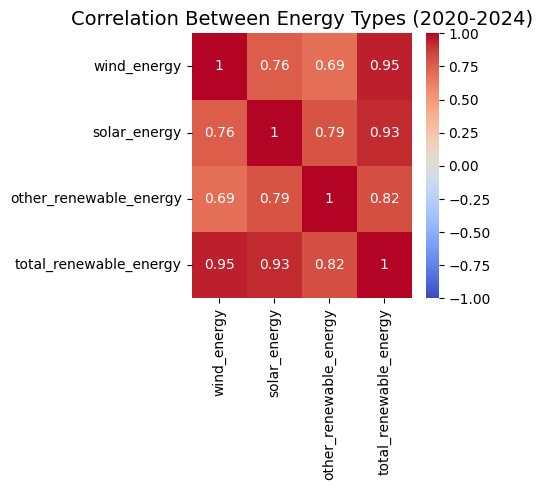

Correlation heatmap saved as 'eda_correlation_heatmap.png'


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = df[['wind_energy', 'solar_energy', 'other_renewable_energy',
                         'total_renewable_energy']].corr()

# Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Energy Types (2020-2024)', fontsize=14)
plt.tight_layout()
plt.savefig('eda_correlation_heatmap.png')
plt.show()
print("Correlation heatmap saved as 'eda_correlation_heatmap.png'")

Outlier Detection

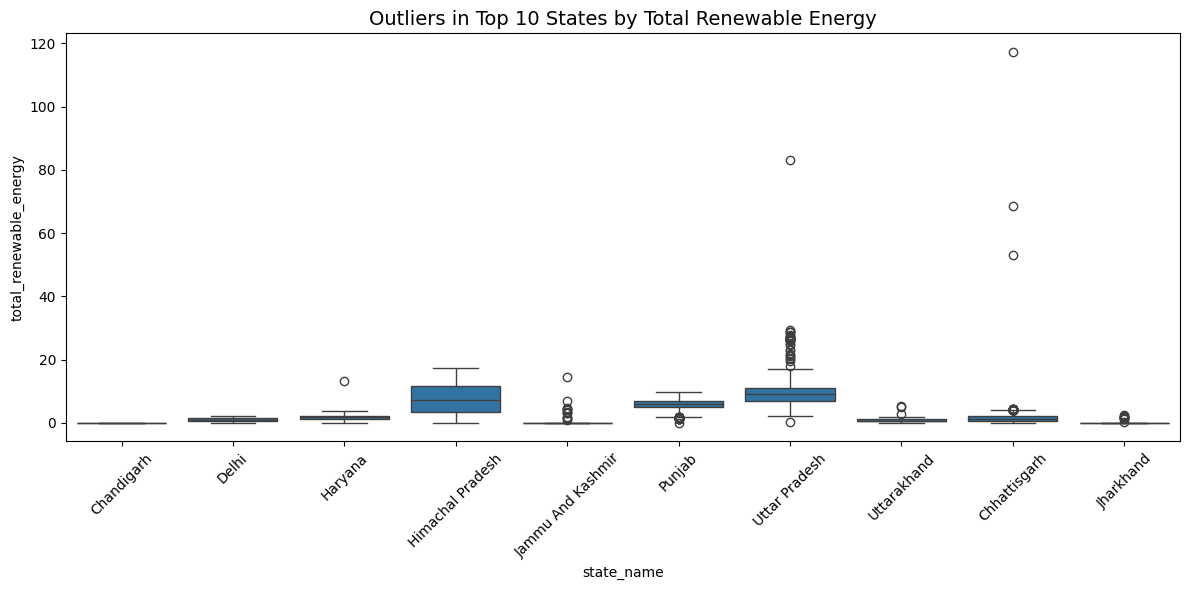

Saved as 'outlier_boxplot.png'


In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='state_name', y='total_renewable_energy', 
            data=df[df['state_name'].isin(df['state_name'].value_counts().head(10).index)])
plt.title('Outliers in Top 10 States by Total Renewable Energy', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outlier_boxplot.png')
plt.show()
print("Saved as 'outlier_boxplot.png'")

VISUALIZATION

Objective 1: Summarize Renewable Energy Production by Region and State

In [14]:
# Drop rows where state_name is 'All India'
df = df.drop(df[df['state_name'] == 'All India'].index)

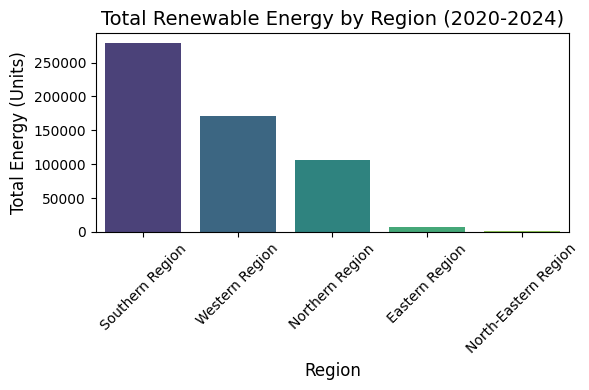

Region totals bar chart saved as 'obj1_region_totals.png'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar charts for total production by region and state.

# Total Renewable Energy by Region
region_totals = df.groupby('region')['total_renewable_energy'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=region_totals.index, y=region_totals.values, hue=region_totals.index, palette='viridis', legend=False)
plt.title('Total Renewable Energy by Region (2020-2024)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Energy (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obj1_region_totals.png')
plt.show()
print("Region totals bar chart saved as 'obj1_region_totals.png'")

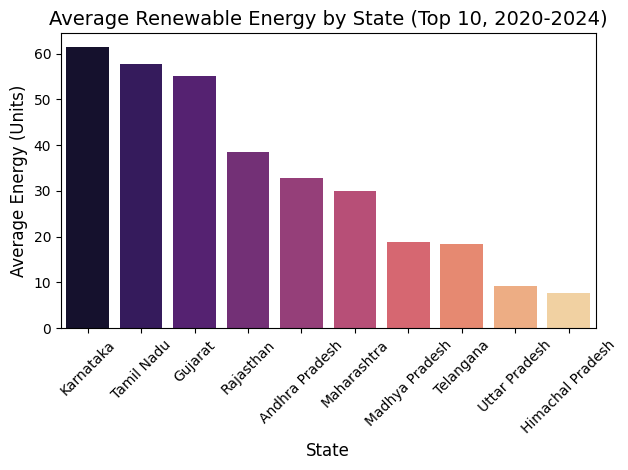

State averages bar chart saved as 'obj1_state_avg.png'


In [ ]:
# Average Renewable Energy by State (Top 10)
state_avg = df.groupby('state_name')['total_renewable_energy'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.index, y=state_avg.values, hue=state_avg.index, palette='magma', legend=False)
plt.title('Average Renewable Energy by State (Top 10, 2020-2024)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Energy (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obj1_state_avg.png')
plt.show()
print("State averages bar chart saved as 'obj1_state_avg.png'")

Objective 2: Track Trends in Renewable Energy Over Time


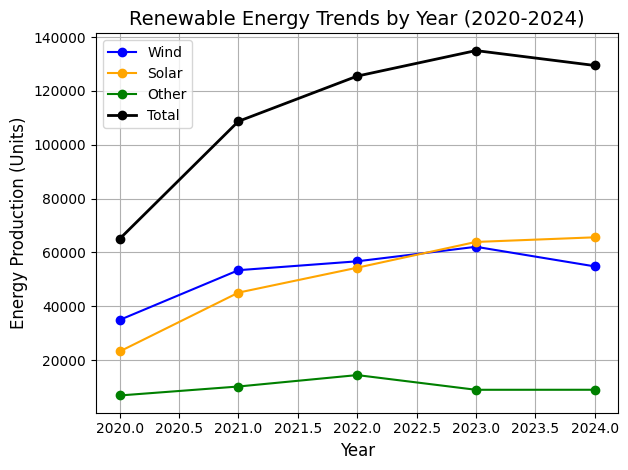

Yearly trends line plot saved as 'obj2_yearly_trends.png'


In [ ]:
# Yearly Trends
yearly_trends = df.groupby('year')[['wind_energy', 'solar_energy', 'other_renewable_energy', 'total_renewable_energy']].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends['wind_energy'], label='Wind', marker='o', color='blue')
plt.plot(yearly_trends.index, yearly_trends['solar_energy'], label='Solar', marker='o', color='orange')
plt.plot(yearly_trends.index, yearly_trends['other_renewable_energy'], label='Other', marker='o', color='green')
plt.plot(yearly_trends.index, yearly_trends['total_renewable_energy'], label='Total', marker='o', color='black', linewidth=2)
plt.title('Renewable Energy Trends by Year (2020-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Production (Units)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('obj2_yearly_trends.png')
plt.show()
print("Yearly trends line plot saved as 'obj2_yearly_trends.png'")

Objective 3: Compare Contributions of Wind, Solar, and Other Renewable Sources

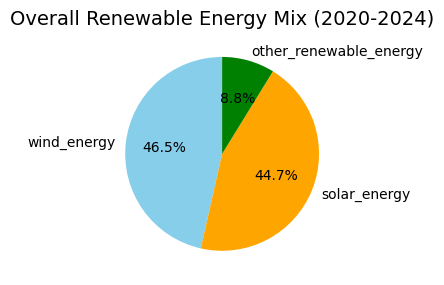

Pie chart saved as 'obj3_energy_mix_pie.png'


In [34]:
# Pie Chart
energy_mix = df[['wind_energy', 'solar_energy', 'other_renewable_energy']].sum()

plt.figure(figsize=(4, 4))
plt.pie(energy_mix, labels=energy_mix.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'], startangle=90)
plt.title('Overall Renewable Energy Mix (2020-2024)', fontsize=14)
plt.tight_layout()
plt.savefig('obj3_energy_mix_pie.png')
plt.show()
print("Pie chart saved as 'obj3_energy_mix_pie.png'")

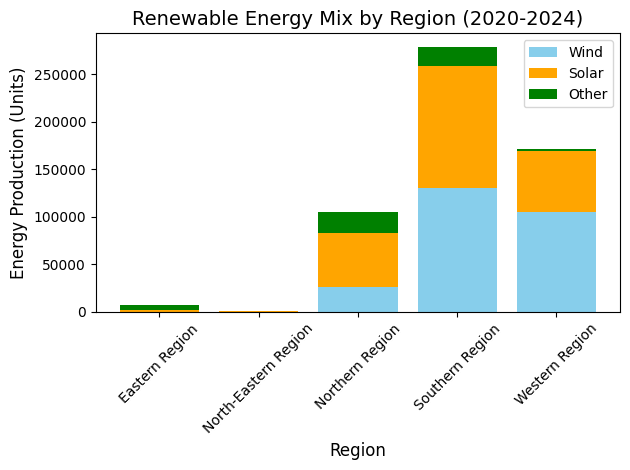

Stacked bar chart saved as 'obj3_region_mix_stacked.png'


In [ ]:
# Regional Energy Mix (Stacked Bar)
region_mix = df.groupby('region')[['wind_energy', 'solar_energy', 'other_renewable_energy']].sum()

plt.figure(figsize=(8, 5))
plt.bar(region_mix.index, region_mix['wind_energy'], label='Wind', color='skyblue')
plt.bar(region_mix.index, region_mix['solar_energy'], bottom=region_mix['wind_energy'], label='Solar', color='orange')
plt.bar(region_mix.index, region_mix['other_renewable_energy'], bottom=region_mix['wind_energy'] + region_mix['solar_energy'], label='Other', color='green')
plt.title('Renewable Energy Mix by Region (2020-2024)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Energy Production (Units)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obj3_region_mix_stacked.png')
plt.show()
print("Stacked bar chart saved as 'obj3_region_mix_stacked.png'")

Objective 4: Identify Top-Performing States and Regions

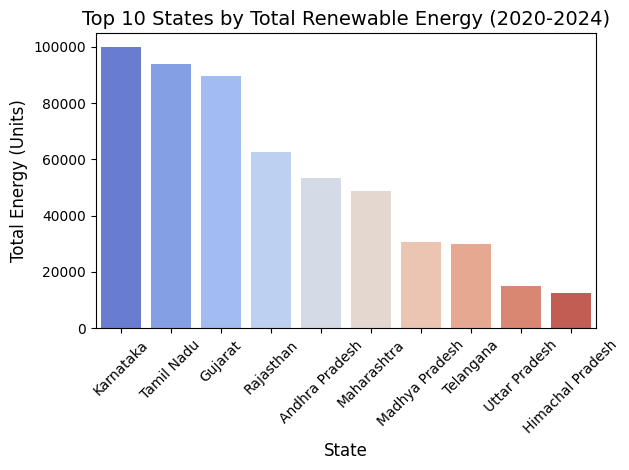

Top states bar chart saved as 'obj4_top_states.png'


In [ ]:

#Top 10 States
state_totals = df.groupby('state_name')['total_renewable_energy'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_totals.index, y=state_totals.values, hue=state_totals.index, palette='coolwarm', legend=False)
plt.title('Top 10 States by Total Renewable Energy (2020-2024)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Energy (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obj4_top_states.png')
plt.show()
print("Top states bar chart saved as 'obj4_top_states.png'")

Objective 5: Examine Seasonal Variations in Energy Production

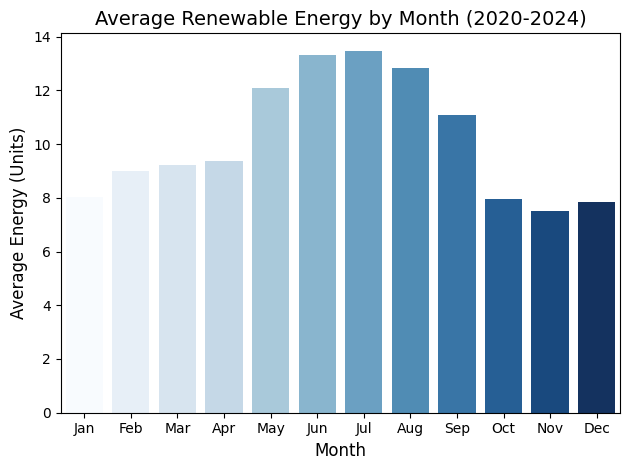

Seasonal variations bar chart saved as 'obj5_seasonal_variations.png'


In [ ]:
# Monthly Averages
monthly_avg = df.groupby('month')['total_renewable_energy'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.index, palette='Blues', legend=False)
plt.title('Average Renewable Energy by Month (2020-2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Energy (Units)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.savefig('obj5_seasonal_variations.png')
plt.show()
print("Seasonal variations bar chart saved as 'obj5_seasonal_variations.png'")

Objective 6: Analyze Regional Disparities in Renewable Energy Adoption

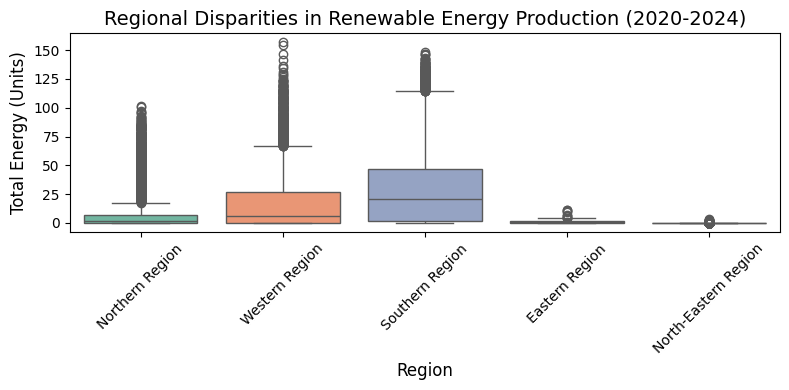

Boxplot saved as 'obj6_regional_disparities.png'


In [46]:
# Boxplot by Region
plt.figure(figsize=(8, 4))
sns.boxplot(x='region', y='total_renewable_energy',hue="region", data=df, palette='Set2')
plt.title('Regional Disparities in Renewable Energy Production (2020-2024)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Energy (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('obj6_regional_disparities.png')
plt.show()
print("Boxplot saved as 'obj6_regional_disparities.png'")

Objective 7: Provide Insights for Policy Recommendations

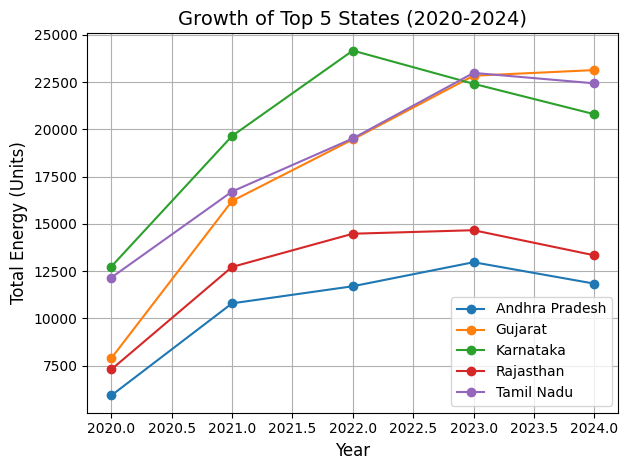

Growth plot saved as 'obj7_top_states_growth.png'


In [ ]:
# Growth of Top 5 States Over Time
top_states = df.groupby('state_name')['total_renewable_energy'].sum().sort_values(ascending=False).head(5).index
top_states_trends = df[df['state_name'].isin(top_states)].groupby(['year', 'state_name'])['total_renewable_energy'].sum().unstack()

plt.figure(figsize=(12, 6))
for state in top_states_trends.columns:
    plt.plot(top_states_trends.index, top_states_trends[state], label=state, marker='o')
plt.title('Growth of Top 5 States (2020-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Energy (Units)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('obj7_top_states_growth.png')
plt.show()
print("Growth plot saved as 'obj7_top_states_growth.png'")

Hypothesis Testing

Shapiro-Wilk (Normality Check)

In [24]:
import scipy.stats as stats

sample = df['total_renewable_energy'].sample(5000, random_state=42)
stat, p = stats.shapiro(sample)
print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.3f}")
if p < 0.05:
    print("Non-normal data (reject H₀). t-tests still viable with large n.")
else:
    print("Normal data (fail to reject H₀).")

Shapiro-Wilk Test: Statistic=0.587, p-value=0.000
Non-normal data (reject H₀). t-tests still viable with large n.


Hypothesis 1: Regional Disparities (t-test)

t-test (Southern vs. Northern): Statistic=68.685, p-value=0.000
Reject H₀: Significant difference.


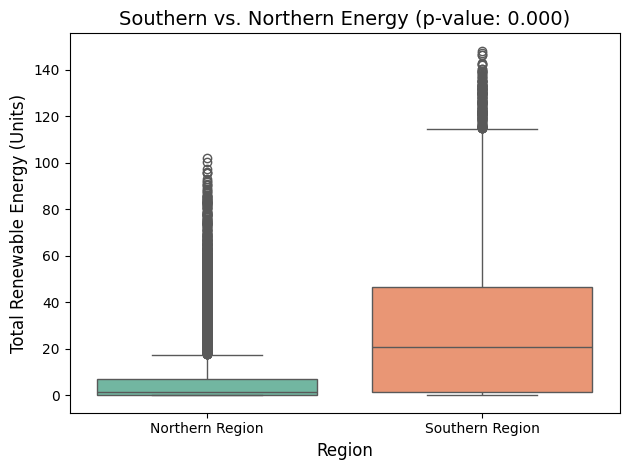

Saved as 'hyp1_ttest_boxplot.png'


In [ ]:
# Hypothesis 1: Regional Disparities (t-test)
southern = df[df['region'] == 'Southern Region']['total_renewable_energy']
northern = df[df['region'] == 'Northern Region']['total_renewable_energy']
stat, p = stats.ttest_ind(southern, northern, equal_var=False)  # Welch’s t-test
print(f"t-test (Southern vs. Northern): Statistic={stat:.3f}, p-value={p:.3f}")
if p < 0.05:
    print("Reject H₀: Significant difference.")
else:
    print("Fail to reject H₀.")

# Visualize (fixed)
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='total_renewable_energy', hue='region', data=df[df['region'].isin(['Southern Region', 'Northern Region'])], palette='Set2', legend=False)
plt.title(f'Southern vs. Northern Energy (p-value: {p:.3f})', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Renewable Energy (Units)', fontsize=12)
plt.tight_layout()
plt.savefig('hyp1_ttest_boxplot.png')
plt.show()
print("Saved as 'hyp1_ttest_boxplot.png'")

Hypothesis 2: Energy Sources (Paired t-test)


Paired t-test (Wind vs. Solar): Statistic=0.201, p-value=0.842
Fail to reject H₀.


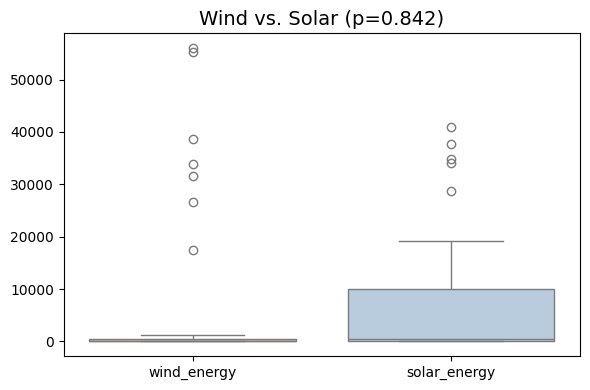

Saved as 'hyp2_ttest.png'


In [50]:
state_energy = df.groupby('state_name')[['wind_energy', 'solar_energy']].sum()
stat, p = stats.ttest_rel(state_energy['wind_energy'], state_energy['solar_energy'])
print(f"\nPaired t-test (Wind vs. Solar): Statistic={stat:.3f}, p-value={p:.3f}")
if p < 0.05:
    print("Reject H₀: Significant difference.")
else:
    print("Fail to reject H₀.")

plt.figure(figsize=(6, 4))
sns.boxplot(data=state_energy[['wind_energy', 'solar_energy']], palette='Pastel1')
plt.title(f'Wind vs. Solar (p={p:.3f})', fontsize=14)
plt.tight_layout()
plt.savefig('hyp2_ttest.png')
plt.show()
print("Saved as 'hyp2_ttest.png'")

Hypothesis 3: Trends Over Time (t-test)


t-test (2020 vs. 2024): Statistic=-7.850, p-value=0.000
Reject H₀: Significant difference.


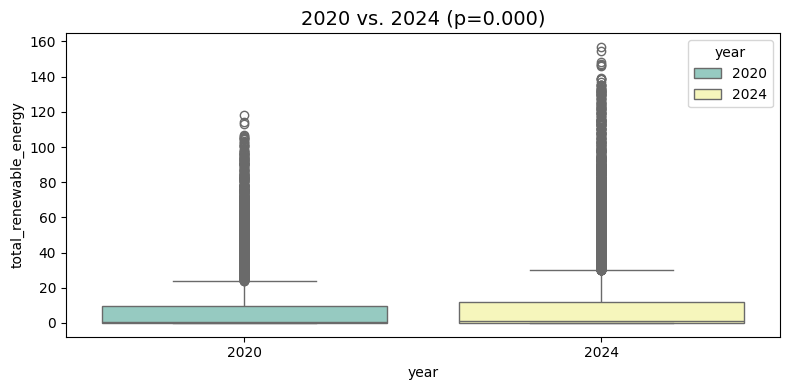

Saved as 'hyp3_ttest.png'


In [53]:
year_2020 = df[df['year'] == 2020]['total_renewable_energy']
year_2024 = df[df['year'] == 2024]['total_renewable_energy']
stat, p = stats.ttest_ind(year_2020, year_2024, equal_var=False)
print(f"\nt-test (2020 vs. 2024): Statistic={stat:.3f}, p-value={p:.3f}")
if p < 0.05:
    print("Reject H₀: Significant difference.")
else:
    print("Fail to reject H₀.")

plt.figure(figsize=(8, 4))
sns.boxplot(x='year', y='total_renewable_energy',hue='year',  data=df[df['year'].isin([2020, 2024])], palette='Set3')
plt.title(f'2020 vs. 2024 (p={p:.3f})', fontsize=14)
plt.tight_layout()
plt.savefig('hyp3_ttest.png')
plt.show()
print("Saved as 'hyp3_ttest.png'")

Hypothesis 3: Chi-squared (Categorical)

In [28]:
# Categorize energy as high/low
df['energy_category'] = pd.qcut(df['total_renewable_energy'], 2, labels=['Low', 'High'])
contingency = pd.crosstab(df['region'], df['energy_category'])
stat, p, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-squared Test (Region vs. Energy Category): Statistic={stat:.3f}, p-value={p:.3f}")
if p < 0.05:
    print("Reject H₀: Region and energy level are related.")
else:
    print("Fail to reject H₀.")


Chi-squared Test (Region vs. Energy Category): Statistic=14993.336, p-value=0.000
Reject H₀: Region and energy level are related.
